## Spatial GA

1.Initialise random pop P </br>
2.Associate each individual with a position x, i.e, let the position of the genotype in thepopulation array indicate the position on a 1D grid.</br>
3.Pick one individual at random, i.e. genotype G1 at position  x1</br>
4.Pick a second individual G2 in the local neighbourhood of the first, i.e., pick acompetitor from the local neighbourhood in the range x1 to x1+k. Or see code inlecture for simpler implementation</br>
5.Compare G1 and G2 finding a winner (W) and loser (L)</br>
6.Copy W over L and add a mutation (remember to reevaluate the fitness of the loser)</br>
7.Until success or give up, goto 3</br>

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from random import randint

In [20]:
knapsack = 20
weights = [3,2,4,5,8,9,10,1,6,7]
benefits = [5,6,1,9,2,8,4,3,7,10]

In [21]:
def fitness_genotype(genotype,benefits,weights,knapsack):
    totalWeight = np.dot(genotype,weights)
    totalBenefits = np.dot(genotype,benefits)
    if totalWeight > knapsack:
        return 0
    else:
        return totalBenefits

In [22]:
def fitness(population,benefits,weights,popSize,knapsack):
    fitnesses = []
    for i in range(popSize):
        if np.dot(population[i],weights)>knapsack:
            fitnesses.append(0)
        else:
            fitnesses.append((np.dot(population[i],benefits)))
    return fitnesses

In [145]:
def mutation_genotype(genotype,mutation_rate):
    for i,gene in enumerate(genotype):
        n = np.random.rand()
        #print(n)
        if n <= mutation_rate:
            r = randint(0,9)
            if genotype[r] == 1:
                genotype[r] = 0
            else:
                genotype[r] = 1
    return genotype

In [158]:
population = np.random.randint(0,2,size=(200,10))
k = 10

In [159]:
maxFitness = [0]
for i in range(1000):
    randomIndex1 = randint(k+1,(population.shape[0]-1)-k)
    randomIndex2 = randint(randomIndex1-k,randomIndex1+k)
    #print(randomIndex1)
    genotype1 = population[randomIndex1]
    genotype2 = population[randomIndex2]
    #print(genotype1)
    fitnessG1 = fitness_genotype(genotype1,benefits,weights,knapsack)
    #print(fitnessG1)
    fitnessG2 = fitness_genotype(genotype2,benefits,weights,knapsack)
    #print(fitnessG2)
    if fitnessG1 > fitnessG2:
        #tempG2 = genotype2
        genotype2 = genotype1
        population[randomIndex2] = mutation_genotype(genotype2,0.2)
    elif fitnessG2 > fitnessG1:
        #tempG1 = genotype1
        genotype1 = genotype2
        population[randomIndex1] = mutation_genotype(genotype1,0.2)
    popFitness = fitness(population,benefits,weights,200,knapsack)
    maxFitness.append(max(popFitness))

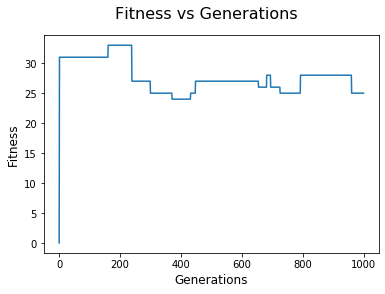

In [160]:
plt.plot(list(range(1001)),maxFitness)
plt.suptitle('Fitness vs Generations', fontsize=16)
plt.ylabel('Fitness', fontsize=12)
plt.xlabel('Generations', fontsize=12)
plt.savefig('SPA.png')
plt.show()